# Basic loading

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import matplotlib.dates as mdates  # add import statement for DateFormatter
from matplotlib.dates import DateFormatter
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
# get data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [5]:
df = pd.read_csv('Preprocessed_data.csv')
coffee_df=pd.read_csv('Coffee_data.csv')
rose_df=pd.read_csv('Rose_df.csv')
pomelo_df=pd.read_csv('Pomelo_df.csv')
ginger_df=pd.read_csv('Ginger_df.csv')
squash_df=pd.read_csv('Squash_df.csv')

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3661 non-null   int64  
 1   Name           3661 non-null   object 
 2   Price          3585 non-null   float64
 3   Sales          3661 non-null   float64
 4   Rating         3661 non-null   float64
 5   Rating record  3661 non-null   float64
 6   Date           3661 non-null   object 
 7   Discount(%)    533 non-null    float64
 8   Category       3661 non-null   object 
 9   Ini_cat        3661 non-null   object 
 10  Group_ID       3661 non-null   int64  
 11  Product_ID     3661 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 343.3+ KB


Unnamed: 0          0
Name                0
Price              76
Sales               0
Rating              0
Rating record       0
Date                0
Discount(%)      3128
Category            0
Ini_cat             0
Group_ID            0
Product_ID          0
dtype: int64

In [7]:
print(df.columns)

Index(['Unnamed: 0', 'Name', 'Price', 'Sales', 'Rating', 'Rating record',
       'Date', 'Discount(%)', 'Category', 'Ini_cat', 'Group_ID', 'Product_ID'],
      dtype='object')


In [8]:
#change Date to datetime type
from datetime import datetime
df['New_date']=pd.to_datetime(df['Date'], format='%Y/%m/%d',errors = 'coerce')
df = df.dropna(subset=['Date'])

df=df.drop(columns=['Date'])
df.columns = df.columns.str.replace('New_date', 'Date')

In [9]:
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()
#daily_sales['Sales_rounded'] = round(daily_sales['Sales']/ 1000000, 2) * 1000
#daily_sales

In [10]:
daily_sales

,Date,Sales
0,2023-02-09,254030.0
1,2023-02-10,304459.0
2,2023-02-11,408011.0
3,2023-02-12,440544.0
4,2023-02-13,320991.0
...,...,...
61,2023-04-11,568700.0
62,2023-04-12,584115.0
63,2023-04-13,471140.0
64,2023-04-14,938750.0


# (Total sales) Without value on each point

In [11]:
df

,Unnamed: 0,Name,Price,Sales,Rating,Rating record,Discount(%),Category,Ini_cat,Group_ID,Product_ID,Date
0,0,Gel rửa mặt cà phê Đắk Lắk Cocoon cho làn da t...,195.00,175.0,4.9,64.0,NaN,Coffee,C,4,C4,2023-02-09
1,1,[DEAL 1 TẶNG 1 ĐỘC QUYỀN FLASH SALE] Bơ dưỡng ...,340.00,629.0,0.0,0.0,NaN,Coffee,C,16,C16,2023-02-09
2,2,Combo Sáng Mịn Sạch Mụn: 1 Gel tắm bí đao Coco...,351.00,1400.0,0.0,0.0,NaN,Coffee,C,3,C3,2023-02-09
3,3,[Mã COSCN12 giảm 8%] Bơ dưỡng thể cà phê Đắk L...,215.00,10500.0,5.0,4300.0,NaN,Coffee,C,17,C17,2023-02-09
4,4,[Mã COSCN12 giảm 8%] Combo làm sạch da chết và...,323.00,1600.0,5.0,576.0,NaN,Coffee,C,19,C19,2023-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...
3656,3656,[Mã COSCN12 giảm 8%] Bigsize - Nước bí đao cân...,250.75,5500.0,0.0,2000.0,15.0,Squash,S,24,S24,2023-04-15
3657,3657,Tinh chất bí đao (serum) 7% Niacinamide sạch m...,250.75,4000.0,0.0,1400.0,15.0,Squash,S,18,S18,2023-04-15
3658,3658,[Mã COSCN12 giảm 8%] Nước bí đao cân bằng da (...,165.75,17600.0,5.0,7400.0,15.0,Squash,S,33,S33,2023-04-15
3659,3659,[Mã COSCN12 giảm 8%] Gel bí đao rửa mặt Cocoon...,NaN,27400.0,5.0,10500.0,15.0,Squash,S,29,S29,2023-04-15


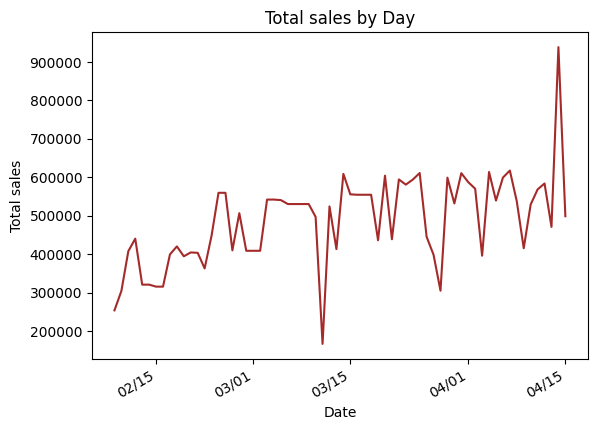

<Figure size 1000x600 with 0 Axes>

In [12]:
# create a line plot of sales by day
#plt.plot(daily_sales['Date'], daily_sales['Sales'], marker='o',color='brown')
plt.plot(daily_sales['Date'], daily_sales['Sales'],color='brown')

# set the x-axis format to display dates in yyyy/mm/dd format
date_format = mdates.DateFormatter('%m/%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()

# add x and y axis labels and a title
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.title('Total sales by Day')

# increase the size of the markers and line
#plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.linewidth'] = 3


# set the figure size to 10 inches wide by 6 inches tall
plt.figure(figsize=(10, 6))

# save the plot as a PNG image
plt.savefig('Total_sales_by_day.png', dpi=600, bbox_inches='tight')

# show the plot
plt.show()

#Category sales

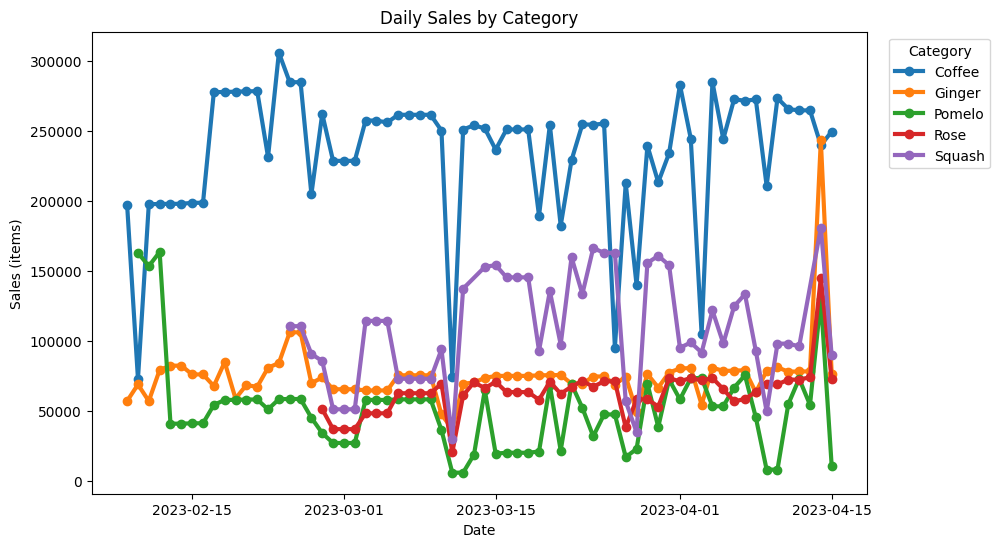

In [13]:
# Group the data by category and date, and calculate the daily sales
category_all = df.groupby(['Category', pd.Grouper(key='Date', freq='D')])['Sales'].sum().reset_index()

# Create a line graph with a legend note
fig, ax = plt.subplots(figsize=(10, 6))

for category in category_all['Category'].unique():
    data = category_all[category_all['Category'] == category]
    ax.plot(data['Date'], data['Sales'], marker='o', label=category)

ax.set_title('Daily Sales by Category')
ax.set_xlabel('Date')
ax.set_ylabel('Sales (items)')
ax.legend(title='Category', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.rcParams['lines.markersize'] = 1.6
plt.rcParams['lines.linewidth'] = 1

plt.show()

In [14]:
category_all

,Category,Date,Sales
0,Coffee,2023-02-09,197004.0
1,Coffee,2023-02-10,72723.0
2,Coffee,2023-02-11,197680.0
3,Coffee,2023-02-12,197800.0
4,Coffee,2023-02-13,197925.0
...,...,...,...
289,Squash,2023-04-10,97951.0
290,Squash,2023-04-11,98041.0
291,Squash,2023-04-12,96029.0
292,Squash,2023-04-14,180993.0


In [15]:
grouped_sales = df.groupby(['Category'])['Sales'].sum()
grouped_sales_df = grouped_sales.reset_index()
grouped_sales_df['Percentage']=(grouped_sales_df['Sales']/(grouped_sales_df['Sales'].sum()))*100

grouped_count = df.groupby(['Category'])['Sales'].count()
grouped_count_df = grouped_count.reset_index()
grouped_count_df['Percentage']=(grouped_count_df['Sales']/(grouped_count_df['Sales'].sum()))*100

In [16]:
grouped_count_df

,Category,Sales,Percentage
0,Coffee,895,24.446872
1,Ginger,1007,27.506146
2,Pomelo,490,13.384321
3,Rose,621,16.962579
4,Squash,648,17.700082


In [17]:
grouped_sales_df

,Category,Sales,Percentage
0,Coffee,15498719.0,48.161292
1,Ginger,4971188.0,15.447653
2,Pomelo,3348298.0,10.404625
3,Rose,3032411.0,9.423026
4,Squash,5330246.0,16.563403


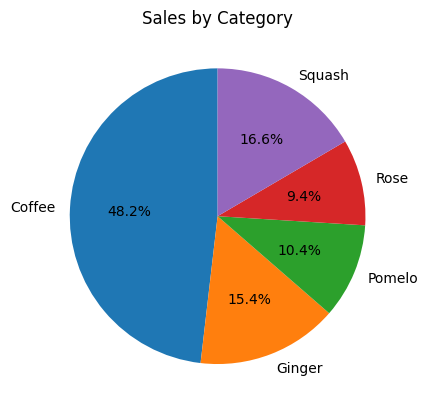

In [18]:
# create a pie chart of sales % using matplotlib
plt.pie(grouped_sales_df['Percentage'], labels=grouped_sales_df['Category'], autopct='%1.1f%%', startangle=90)

# add a title to the chart
plt.title('Sales by Category')

# show the chart
plt.show()

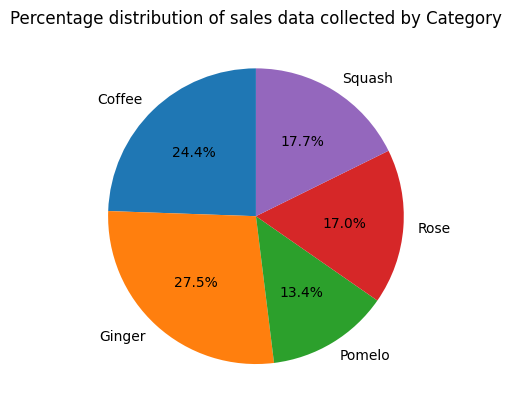

In [19]:
#create a pie chart of sales % using matplotlib
plt.pie(grouped_count_df['Percentage'], labels=grouped_count_df['Category'], autopct='%1.1f%%', startangle=90)

# add a title to the chart
plt.title('Percentage distribution of sales data collected by Category')

# show the chart
plt.show()

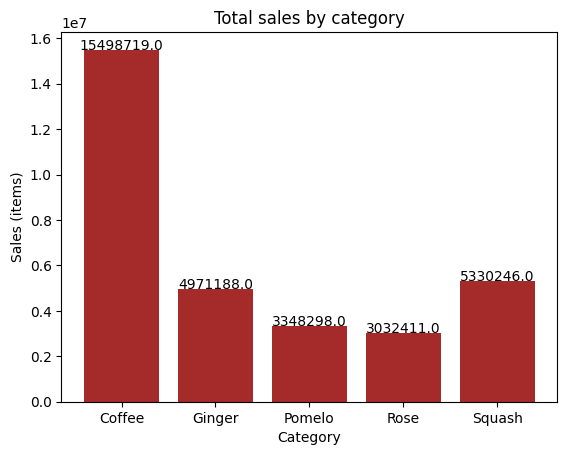

In [20]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Create a bar graph
ax.bar(grouped_sales_df['Category'], grouped_sales_df['Sales'], color='brown')

# Set the title and axis labels
ax.set_title('Total sales by category')
ax.set_xlabel('Category')
ax.set_ylabel('Sales (items)')

# Add labels with values above the bars
for i, v in enumerate(grouped_sales_df['Sales']):
    ax.text(i, v, str(v), ha='center')

# Display the graph
plt.show()

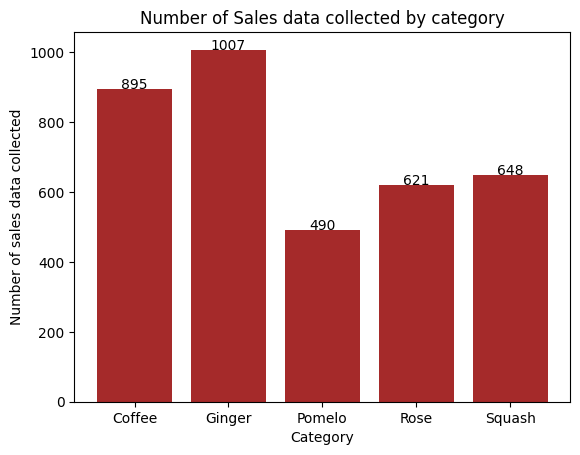

In [21]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Create a bar graph
ax.bar(grouped_count_df['Category'], grouped_count_df['Sales'], color='brown')

# Set the title and axis labels
ax.set_title('Number of Sales data collected by category')
ax.set_xlabel('Category')
ax.set_ylabel('Number of sales data collected')

# Add labels with values above the bars
for i, v in enumerate(grouped_count_df['Sales']):
    ax.text(i, v+1, str(v), ha='center')

# Display the graph
plt.show()

# Rating and Rating record

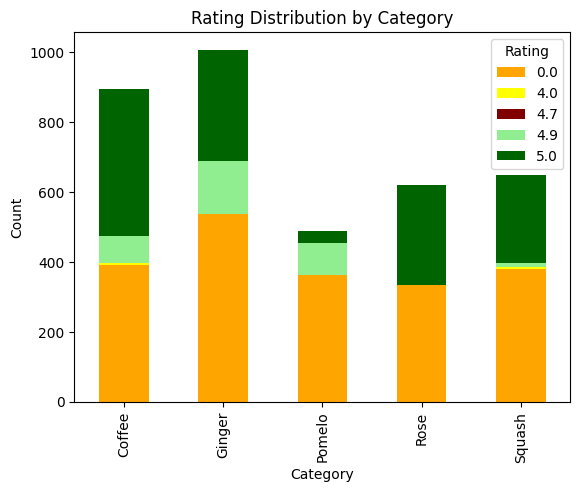

In [22]:
# group by Category and Rating, and count the number of occurrences
count_rating = df.groupby(['Category', 'Rating'])['Rating'].count()
#count_rating_df = count_rating.reset_index()
# create a dictionary to map values to colors
color_map = {0.0:'orange', 4.0:'yellow',4.7: 'maroon', 4.9: 'lightgreen', 5.0: 'darkgreen'}
ascending=True
# pivot the Rating values into separate columns
count_rating_df = count_rating.unstack(level=-1)

# plot a stacked bar chart with the color of the Rating value
count_rating_df.plot(kind='bar', stacked=True, color=color_map)

# customize the plot
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Rating Distribution by Category')
plt.legend(title='Rating', loc='upper right', labels=color_map)
plt.show()

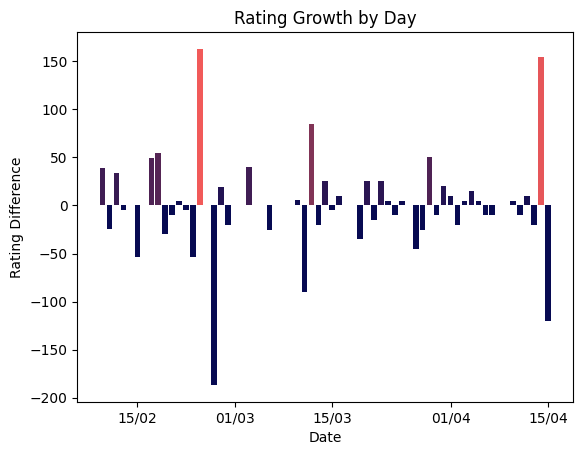

In [23]:
# Create a gradient color map
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as dates

cmap = LinearSegmentedColormap.from_list('mycmap', ['#070A52', '#F15A59'])

# Group the data by date and calculate the daily sales
daily_rate = df.groupby(pd.Grouper(key='Date', freq='D'))['Rating'].sum().reset_index()

# Calculate the difference in sales between consecutive days
daily_rate['Rate_diff'] = daily_rate['Rating'].diff()

# Create a bar chart of sales difference by day
fig, ax = plt.subplots()
ax.bar(daily_rate['Date'], daily_rate['Rate_diff'], color=cmap(daily_rate['Rate_diff']/daily_rate['Rate_diff'].max()))
ax.set_title('Rating Growth by Day')
ax.set_xlabel('Date')
ax.set_ylabel('Rating Difference')

# Set date format
date_format = '%d/%m'
ax.xaxis.set_major_formatter(dates.DateFormatter(date_format))


plt.show()

# Sales difference

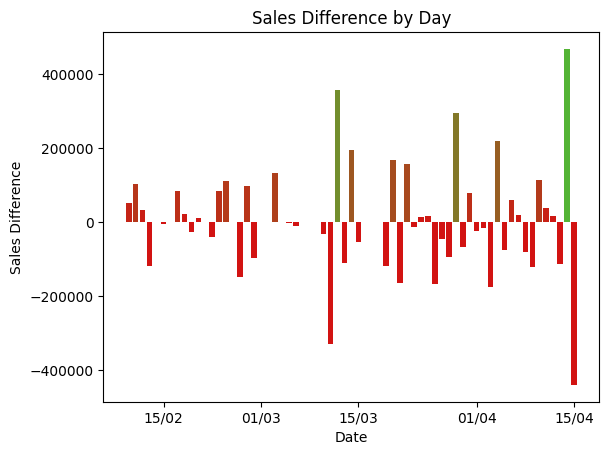

In [24]:
# Create a gradient color map
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as dates

cmap = LinearSegmentedColormap.from_list('mycmap', ['#D21312', '#54B435'])

# Group the data by date and calculate the daily sales
daily_sales = df.groupby(pd.Grouper(key='Date', freq='D'))['Sales'].sum().reset_index()

# Calculate the difference in sales between consecutive days
daily_sales['Sales_diff'] = daily_sales['Sales'].diff()

# Create a bar chart of sales difference by day
fig, ax = plt.subplots()
ax.bar(daily_sales['Date'], daily_sales['Sales_diff'], color=cmap(daily_sales['Sales_diff']/daily_sales['Sales_diff'].max()))
ax.set_title('Sales Difference by Day')
ax.set_xlabel('Date')
ax.set_ylabel('Sales Difference')

# Set date format
date_format = '%d/%m'
ax.xaxis.set_major_formatter(dates.DateFormatter(date_format))

# Add line for average discount
# discount = df['Discount']
# ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
# ax.axhline(y=discount * 100, color='red', linestyle='--', linewidth=1)
# ax.text(-0.5, discount * 100 + 5, 'Avg. Discount: {:.2f}%'.format(discount * 100), color='red', fontsize=10)

plt.show()

# Top lists 

In [25]:
ID_sales = df.groupby(['Product_ID','Category'])['Sales'].sum()
ID_sales_df = ID_sales.reset_index()
ID_sales_df

,Product_ID,Category,Sales
0,C1,Coffee,4977.0
1,C10,Coffee,1782.0
2,C11,Coffee,642300.0
3,C12,Coffee,4.0
4,C13,Coffee,220300.0
...,...,...,...
114,S5,Squash,1239.0
115,S6,Squash,2616.0
116,S7,Squash,28200.0
117,S8,Squash,20200.0


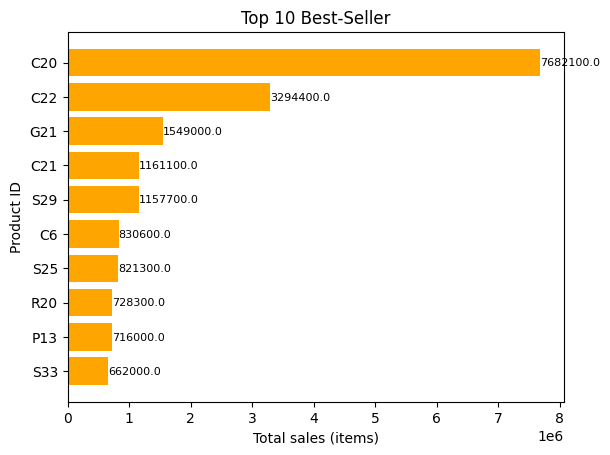

In [26]:
# Sort data by sales and get top 10 sellers
ID_sorted = ID_sales_df.sort_values('Sales', ascending=True)
ID_top10 = ID_sorted.tail(10)

# Create plot
fig, ax = plt.subplots()
ax.barh(ID_top10['Product_ID'], ID_top10['Sales'],color='orange')

# Set plot title and labels
ax.set_title('Top 10 Best-Seller')
ax.set_xlabel('Total sales (items)')
ax.set_ylabel('Product ID')

# Add data labels
for i, v in enumerate(ID_top10['Sales']):
    ax.text(v + 5 , i - 0.1, str(v), color='black', fontsize=8)

# Show plot
plt.show()

In [27]:
for category in category_all['Category'].unique():
    ID_top10 = category_all[category_all['Category'] == category]

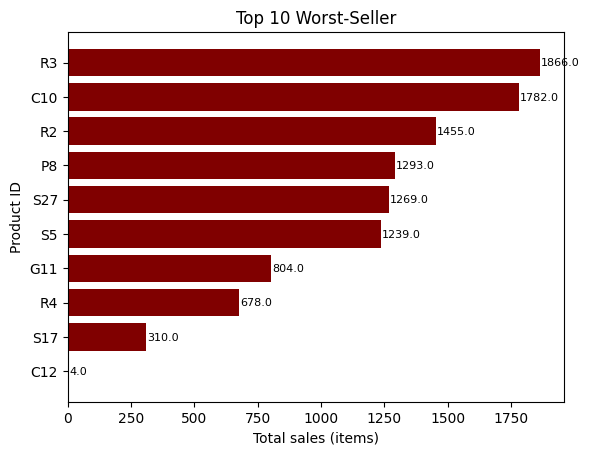

In [29]:
ID_bot10 = ID_sorted.head(10)

# Create plot
fig, ax = plt.subplots()
ax.barh(ID_bot10['Product_ID'], ID_bot10['Sales'],color='maroon')

# Set plot title and labels
ax.set_title('Top 10 Worst-Seller')
ax.set_xlabel('Total sales (items)')
ax.set_ylabel('Product ID')

# Add data labels
for i, v in enumerate(ID_bot10['Sales']):
    ax.text(v + 3, i - 0.1, str(v), color='black', fontsize=8)

# Show plot
plt.show()

# Relationship plots (Scatter plot, Box plot, Heatmap)

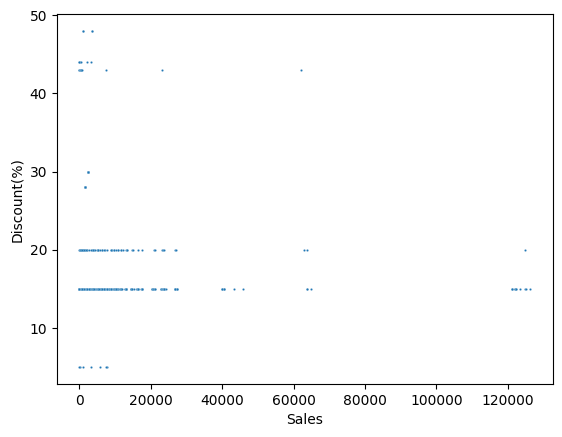

<function seaborn.relational.relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)>

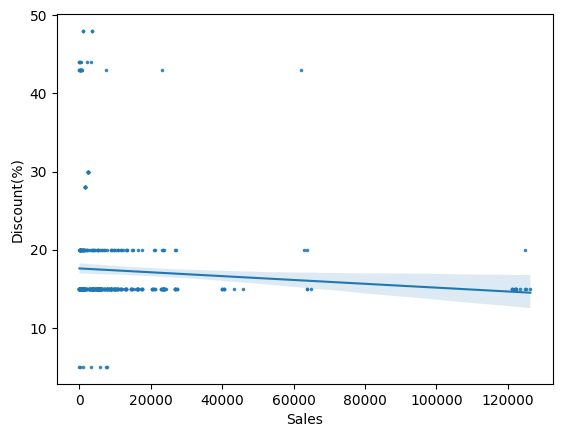

In [30]:
sns.scatterplot(x='Sales', y='Discount(%)', data=df)
plt.show()
# to show the trend line of this relationship:
sns.regplot(x='Sales', y='Discount(%)', data=df)
sns.relplot

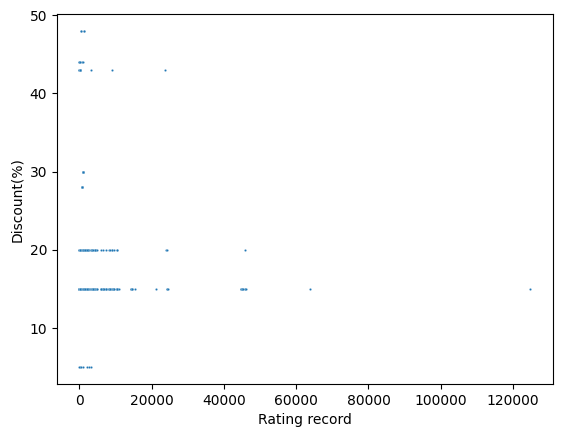

<function seaborn.relational.relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)>

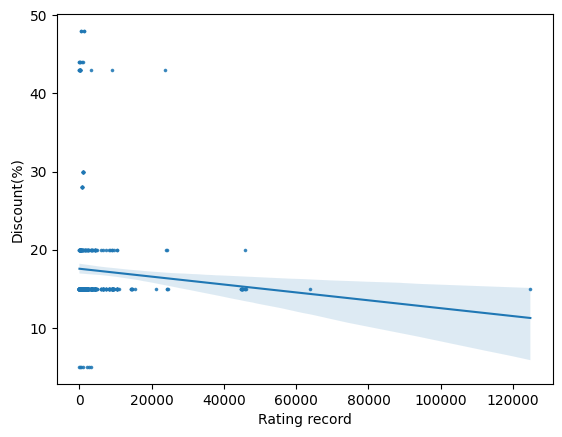

In [31]:
sns.scatterplot(x='Rating record', y='Discount(%)', data=df)
plt.show()
# to show the trend line of this relationship:
sns.regplot(x='Rating record', y='Discount(%)', data=df)
sns.relplot

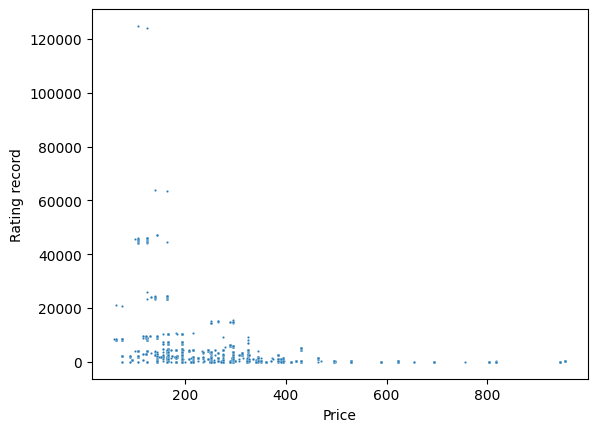

<function seaborn.relational.relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)>

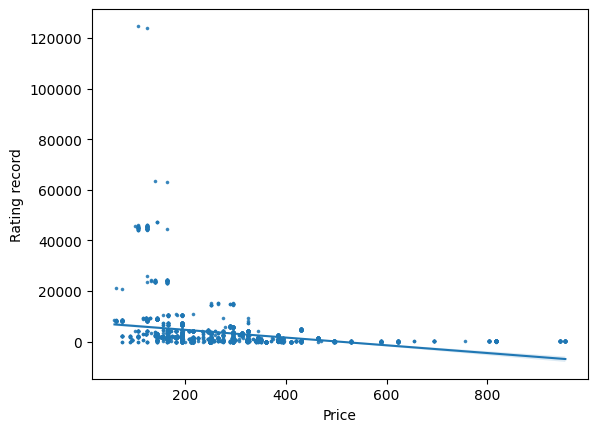

In [32]:
sns.scatterplot(x='Price', y='Rating record', data=df)
plt.show()
# to show the trend line of this relationship:
sns.regplot(x='Price', y='Rating record', data=df)
sns.relplot

In [33]:
null_disc = df.dropna(subset=['Discount(%)'])

from scipy.stats import pearsonr
r, p = pearsonr(null_disc['Sales'], null_disc['Discount(%)'])

print("Pearson's r correlation coefficient:", r)
print("p-value:", p)

Pearson's r correlation coefficient: -0.07528311240456914
p-value: 0.0824878478911953


The Pearson's r correlation coefficient of -0.099 indicates a weak negative correlation between the two variables, "Sales" and "Discount(%)". A negative correlation means that as one variable increases, the other variable tends to decrease.

The p-value of 0.119 suggests that the correlation coefficient is not statistically significant at the standard 0.05 significance level, meaning there is a 11.9% chance that we would observe this correlation coefficient by chance alone. This indicates that we do not have sufficient evidence to conclude that there is a significant linear relationship between the two variables.

Overall, the result suggests that there is a weak negative relationship between "Sales" and "Discount(%)", but it is not strong enough to be statistically significant. It is important to note that correlation does not imply causation, and there may be other factors that are affecting the relationship between these variables. Further analysis and modeling may be necessary to understand the relationship more fully.

In [34]:
df['Rating'].value_counts()

0.0    2006
5.0    1312
4.9     330
4.0      11
4.7       2
Name: Rating, dtype: int64

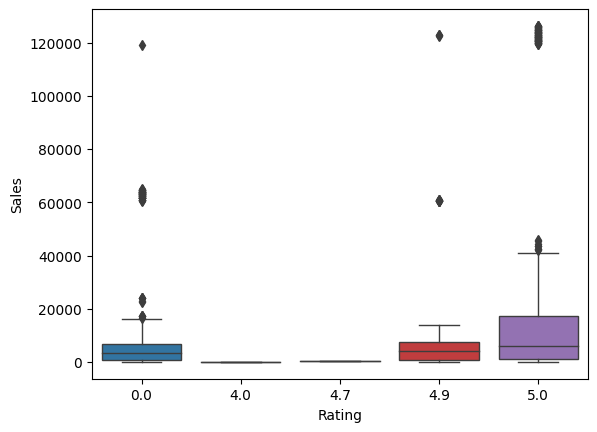

In [35]:
sns.boxplot(x=df['Rating'],y=df['Sales'])
plt.show()

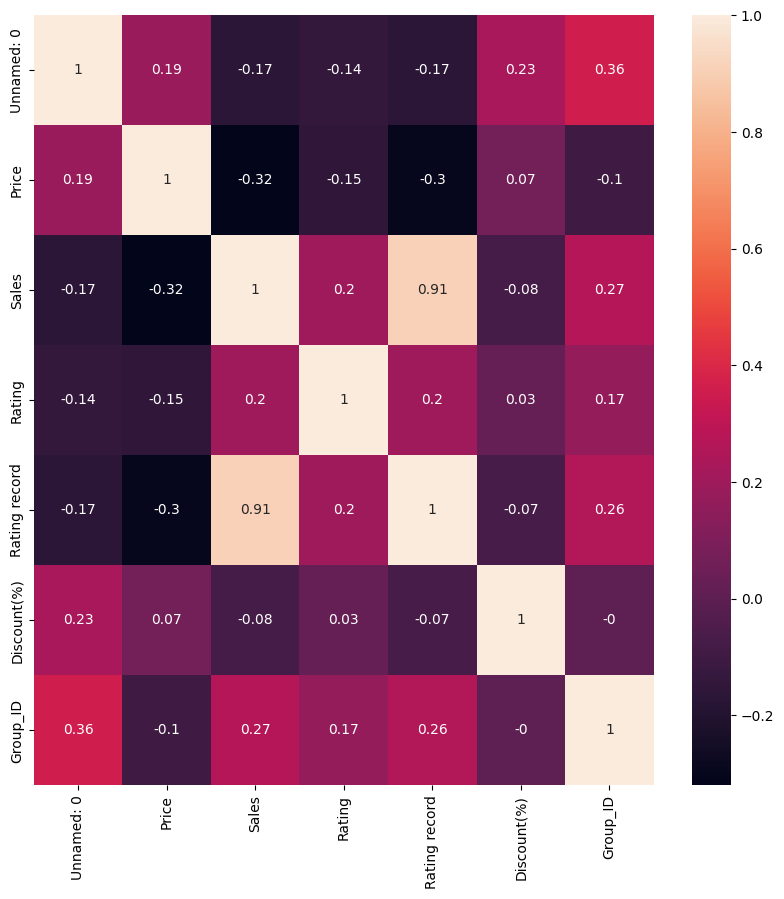

In [36]:
plt.figure(figsize=(10,10)) # resize the figure size in plots
sns.heatmap(round(df.corr(),2),annot=True)
plt.show()

The code you provided is creating a heatmap using the Seaborn library to visualize the correlation matrix of a pandas DataFrame called df. Here's what you can learn from the plot:

The heatmap shows a color-coded matrix of the pairwise correlations between all the numeric columns in the DataFrame. Each cell in the matrix represents the correlation coefficient between two variables, with darker colors indicating stronger positive correlations and lighter colors indicating weaker correlations or negative correlations.

The diagonal cells of the matrix represent the correlation between a variable and itself, which is always equal to 1.

The annot=True parameter displays the correlation coefficients as text annotations in each cell of the matrix, making it easier to interpret the heatmap.

The round() function is used to round the correlation coefficients to two decimal places for readability.

By setting figsize=(10,10), the size of the heatmap figure is set to 10 by 10 inches.

Overall, the heatmap provides a visual summary of the pairwise correlations between all the variables in the DataFrame, allowing you to identify which variables are positively or negatively correlated with each other, and which variables may be less important in predicting the target variable. It can also help identify any multicollinearity issues between predictor variables that may affect the performance of a machine learning model.